# Exam Project: The formation of ISIS' Social Media Network

Group members: Zeyu Zhao, Helge Zille, Edith Zink, Sina Smid

In [6]:
import os
import requests
import re
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
plt.style.use('ggplot')
import datetime
import wordcloud
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
# NLTK 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import bigrams 
from textblob import TextBlob # pip install -U textblob
# Functions
from our_functions import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ss.egb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Data import:** 
- Dataset is downloaded from Kaggle (https://www.kaggle.com/fifthtribe/how-isis-uses-twitter)
- Some of text is in Arabic, this will be ignored (encoding = 'Latin-1') and only Latin (English?) text will be used in the analysis

In [8]:
data = read_tweets('tweets_1.csv')
data

,name,username,description,location,followers,numberstatuses,time,tweets,date,translated
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:07:00,'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ...,2015-01-06,True
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:27:00,SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF IN...,2015-01-06,True
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:29:00,FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...,2015-01-06,True
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:37:00,"SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP...",2015-01-06,True
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:45:00,AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT...,2015-01-06,True
5,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:51:00,THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...,2015-01-06,False
6,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:04:00,OH MURABIT! : http://t.co/hujLj9KGkG http://t...,2015-01-06,True
7,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:06:00,'A COLLECTION OF THE WORDS OF THE U'LAMA REGA...,2015-01-06,True
8,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:17:00,Aslm Please share our new account after the pr...,2015-01-06,False
9,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-10 00:05:00,AQAP STATEMENT REGARDING THE BLESSED RAID IN ...,2015-01-10,True


**Descriptive Analysis** moved to another notebook!

In [9]:
# OVERVIEW ON ALL TWEETS (to see what needs to be cleaned):
# Count terms only once, equivalent to Document Frequency
terms_single = set(data['tweets'])
terms_single

# NOTE: KEEP FOR LATER USE
# Count hashtags only
#terms_hash = [term for term in preprocess(data['tweets']) 
              #if term.startswith('#')]
# Count terms only (no hashtags, no mentions)
#terms_only = [term for term in preprocess(data['tweets']) 
              #if term not in stop and
              #not term.startswith(('#', '@'))] 
              # mind the ((double brackets))
              # startswith() takes a tuple (not a list) if 
              # we pass a list of inputs

{'#YEMEN\nAnsar Al Sharia Destroyed Music CDs In #Hadhramout. https://t.co/NSn55QFjpw',
 'RT @MaghrebiQM: Locations the Turkish NATO army is shelling right now\nhttps://t.co/n4M48yOciq',
 "@Metammorph moi j'ai mais je veut d'abord ma kanette gold + dessert anakeur",
 '#IS Recaptured al-Raii town and 10 Villages from #Rebels in north #Aleppo.',
 'RT @almunajjid_En: The truth does not need falsehood in order to establish it. (Talbees Iblees by Ibn Al-Jawzi)',
 '#AmaqAgency Colonel Marwan Abu Shawqi, Head of Aden City Traffic Police has been killed by #IslamicState Fighters https://t.co/y1Y5CUagNs',
 'RT @WarReporter1: Map showing the "Hudna" (truce) Syrian rebels have with Assad allowing Assad to free up resources to attack Palmyra: http…',
 'Who is the agent of US again? https://t.co/kfLGEuvuuI',
 "They accused #ISIS of a political play for Assad in Palmyra. #Syria|n 'rebels' have been doing this for ~5 years https://t.co/pdJmGHHnhy",
 'RT @Terror_Monitor: #SYRIA\n#IslamicState Capture 

**This notebook contains**

**1. Preprocessing of tweets - Data cleaning:**
- Prepare a clean `tweets` column for text analysis
- Note: stemming and lemmatizing is not so important for twitter data

**2. Remove Stop-Words**:
- Create top 25 words
- Note: should we use most frequent words or English Dictionary Stopwords
- Method note: For twitter analysis, it is important to remove the stopwords

**3. Tokenization**:
- Method 1: split tweets into words
- Method 2: sentiment analysis (positive/negative)
- Method 3: emoji analysis 

**1. Preprocessing**

Twitter preprocessor (https://pypi.org/project/tweet-preprocessor/) 
- Preprocessor is a preprocessing library for tweet data written in Python.
- When building Machine Learning systems based on tweet data, a preprocessing is required. This library makes it easy to clean, parse or tokenize the tweets.
- Currently supports cleaning, tokenizing and parsing: URLs, Hashtags, Mentions, Reserved words (RT, FAV), Emojis, Smileys

**Note**: Don't forget: `pip install tweet-preprocessor`, if this doesn't work for you (it didn't for me), run `pip install 'path to github folder`, that's where I saved the file 

In [8]:
# tweets is the uncleaned column in the dataset
#import preprocessor as p

**1.Preprocessing**: Takes care of the following parts of the tweets:
- References: `@`
- Retweets: `RT`
- Hashtags to topics: `#`
- Links: `http\`

In [10]:
# TO-DO What is about the \n??
# How to reasonable delete non-word characters?

# Extract the @ tags and remove it from the tweets
def extract_from_to_column(df, regex, from_col, to_col):
    df[to_col]=df[from_col].apply(lambda x: " ".join(regex.findall(x)))
    return df

def remove_from_body(df,regex):
    df['tweets']=df.tweets.apply(lambda x: re.sub(regex,'',x))
    return df

regex1 = re.compile("@(\S+)")   # tagged users
regex2 = re.compile("http\S+")  # urls
regex3 = re.compile("ENGLISH TRANS[^:]*:") # prefix
regex4 = re.compile("#(\S+)") # hashtags
regex5 = re.compile("RT\s") # retweets

data = extract_from_to_column(data, regex1, 'tweets', 'tags')
data = remove_from_body(data, regex1)

data = extract_from_to_column(data, regex2, 'tweets', 'links')
data = remove_from_body(data, regex2)

data = remove_from_body(data, regex3)

data = extract_from_to_column(data, regex4, 'tweets', 'hashtag')
data = remove_from_body(data, regex4)

data = extract_from_to_column(data, regex5, 'tweets', 'retweets')
data = remove_from_body(data, regex5)

data.tags = data.tags.str.split()
data.head(1000)

,name,username,description,location,followers,numberstatuses,time,tweets,date,translated,tags,links,hashtag,retweets
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:07:00,'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ...,2015-01-06,True,[],http://t.co/73xFszsjvr http://t.co/x8BZcscXzq,,
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:27:00,SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF IN...,2015-01-06,True,[],http://t.co/uqqzXGgVTz http://t.co/A7nbjwyHBr,,
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:29:00,FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...,2015-01-06,True,[],http://t.co/TgXT1GdGw7 http://t.co/ZuE8eisze6,,
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:37:00,"SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP...",2015-01-06,True,[],http://t.co/3qg5dKlIwr http://t.co/7bqk1wJAzC,,
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:45:00,AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT...,2015-01-06,True,[],http://t.co/2EYm9EymTe,,
5,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:51:00,THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...,2015-01-06,False,[],http://t.co/EPaPRlph5W http://t.co/4VUYszairt,,
6,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:04:00,OH MURABIT! :,2015-01-06,True,[],http://t.co/hujLj9KGkG http://t.co/t9IxMtBVGK,,
7,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:06:00,'A COLLECTION OF THE WORDS OF THE U'LAMA REGA...,2015-01-06,True,[],http://t.co/AJbayWNxDQ http://t.co/mAycbhaUzH,,
8,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:17:00,Aslm Please share our new account after the pr...,2015-01-06,False,"[KhalidMaghrebi, seifulmaslul123, CheerLeadUni...",,,
9,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-10 00:05:00,AQAP STATEMENT REGARDING THE BLESSED RAID IN ...,2015-01-10,True,[],http://t.co/qvErFO25Qj http://t.co/YIcnGMVjiX,,


In [11]:
# get a word count per sentence column
def word_count(sentence):
    return len(sentence.split())
    
data['word count'] = data['tweets'].apply(word_count)
data.head(3)

,name,username,description,location,followers,numberstatuses,time,tweets,date,translated,tags,links,hashtag,retweets,word count
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:07:00,'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ...,2015-01-06,True,[],http://t.co/73xFszsjvr http://t.co/x8BZcscXzq,,,13
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:27:00,SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF IN...,2015-01-06,True,[],http://t.co/uqqzXGgVTz http://t.co/A7nbjwyHBr,,,12
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:29:00,FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...,2015-01-06,True,[],http://t.co/TgXT1GdGw7 http://t.co/ZuE8eisze6,,,9


In [12]:
# get most common words
all_words = []
for line in list(data['tweets']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(25)

[('the', 7452),
 ('in', 6617),
 ('of', 5932),
 ('to', 4203),
 ('and', 3423),
 ('a', 2968),
 ('is', 2759),
 ('on', 1735),
 ('by', 1696),
 ('for', 1518),
 ('with', 1363),
 ('&amp;', 1352),
 ('from', 1283),
 ('are', 1227),
 ('you', 1218),
 ('killed', 1185),
 ('they', 1139),
 ('that', 967),
 ('this', 943),
 ('army', 849),
 ('it', 800),
 ('was', 763),
 ('not', 755),
 ('have', 751),
 ('i', 750)]

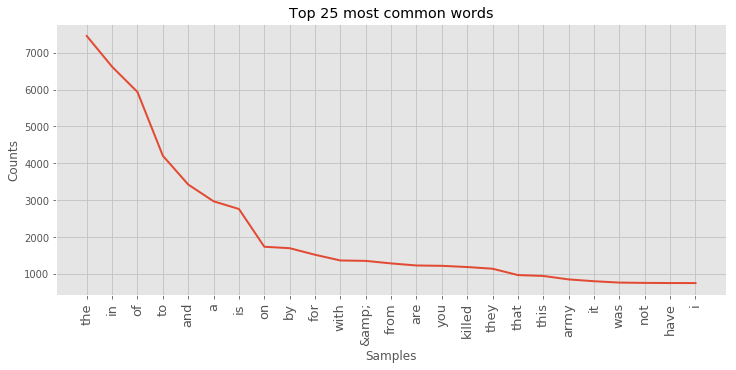

Text(0.5, 1.0, 'log-log plot of words frequency')

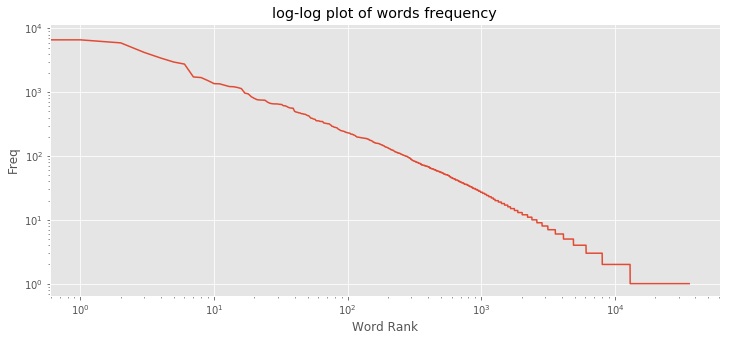

In [13]:
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

**Note**:
- The word distribution present in this data dictionary is a very common phenomenon in large samples of words as shown by Zipf’s law where the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, etc. (see: https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb)
- Remove stopwords (top 10?) later on

In [14]:
# remove stop-words, plus rt and via
stop = stopwords.words('english') + ['rt', 'via'] # we can define any list of words here
terms_stop = [term for term in (data['tweets']) if term not in stop]
data['tweets'] = data['tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['tweets'].head()

0    'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH A...
1    SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF INT...
2    FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWLA...
3    SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP:...
4    AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT ...
Name: tweets, dtype: object

In [15]:
# Spelling corrections with textblob library
data['tweets'][:5].apply(lambda x: str(TextBlob(x).correct()))
data['tweets'].head()

0    'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH A...
1    SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF INT...
2    FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWLA...
3    SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP:...
4    AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT ...
Name: tweets, dtype: object

In [16]:
# Remove punctuations and additional signs
data['tweets'] = data['tweets'].str.replace('[^\w\s]','')
data['tweets'].head()

0    A MESSAGE TO THE TRUTHFUL IN SYRIA  SHEIKH ABU...
1    SHEIKH FATIH AL JAWLANI FOR THE PEOPLE OF INTE...
2    FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWLA...
3    SHEIKH NASIR AL WUHAYSHI HA LEADER OF AQAP THE...
4    AQAP RESPONSE TO SHEIKH BAGHDADIS STATEMENT AL...
Name: tweets, dtype: object

In [21]:
# tokenize into words
tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    # remove words less than three letters
    tokens = [word for word in tokens if len(word) >= 3]

    # lower capitalization
    tokens = [word.lower() for word in tokens]

    # lemmatize
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    preprocessed_text= ' '.join(tokens)

    return preprocessed_text 

In [24]:
# remove words less than three letters
tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
data['tweets'] = data['tweets'].apply(lambda x: ' '.join([word for word in tokens if len(word) >= 3]))
data.head()

NameError: name 'text' is not defined

**Remove Stop-words and Stemming**

In [26]:
# get most common words AFTER removing stop words
all_words = []
for line in list(data['tweets']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
stop_words = set(stopwords.words('english'))
tweets_stop = [w for w in all_words if not w in stop_words]

Counter(tweets_stop).most_common(25)

[('amp', 1359),
 ('killed', 1286),
 ('army', 895),
 ('isis', 816),
 ('us', 810),
 ('state', 697),
 ('islamic', 675),
 ('allah', 582),
 ('near', 576),
 ('soldiers', 529),
 ('today', 527),
 ('attack', 506),
 ('forces', 482),
 ('al', 478),
 ('city', 460),
 ('one', 454),
 ('assad', 437),
 ('people', 423),
 ('2', 388),
 ('abu', 369),
 ('fighters', 359),
 ('syrian', 351),
 ('new', 339),
 ('regime', 326),
 ('video', 316)]

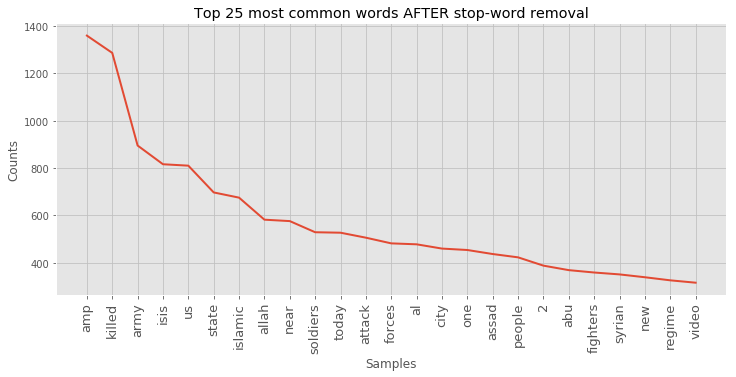

In [27]:
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words AFTER stop-word removal')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(tweets_stop)
fd.plot(25,cumulative=False)

In [30]:
#NLTK provides several stemmer interfaces like Porter stemmer, #Lancaster Stemmer, Snowball Stemmer
porter = PorterStemmer()
stems = []
for t in tweets_stop:    
    stems.append(porter.stem(t))
print(stems)

['messag', 'truth', 'syria', 'sheikh', 'abu', 'muham', 'al', 'maqdisi', 'sheikh', 'fatih', 'al', 'jawlani', 'peopl', 'integr', 'sacrific', 'easi', 'first', 'audio', 'meet', 'sheikh', 'fatih', 'al', 'jawlani', 'ha', 'sheikh', 'nasir', 'al', 'wuhayshi', 'ha', 'leader', 'aqap', 'promis', 'victori', 'aqap', 'respons', 'sheikh', 'baghdadi', 'statement', 'although', 'disbeliev', 'dislik', 'second', 'clip', 'dawah', 'seri', 'soldier', 'jn', 'video', 'link', 'oh', 'murabit', 'collect', 'word', 'ulama', 'regard', 'dawlah', 'aslm', 'pleas', 'share', 'new', 'account', 'previou', 'one', 'suspend', 'aqap', 'statement', 'regard', 'bless', 'raid', 'franc', 'new', 'link', 'previou', 'one', 'taken', 'downaqapth', 'face', 'brighten', 'regard', 'bless', 'attack', 'franc', 'sheikh', 'abu', 'hassan', 'al', 'kuwaiti', 'ha', 'advic', 'nabi', 'saw', 'mujahideen', 'translat', 'either', 'aslm', 'anybodi', 'translat', 'new', 'jn', 'video', 'translat', 'nobodi', 'els', 'translat', 'inshallah', 'let', 'us', 'knw',

In [ ]:
# Create new column in data - without stopwords, for later usage
stop = stopwords.words('english')

data['tweets_without_stop'] = data['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head()

**Tokenization**:
- word split
- bigrams
- types of words
- term co-occurence
- sentiment analysis

In [32]:
# Version 1 Tokenization: Bigrams
terms_bigram = bigrams(tweets_stop)
print(terms_bigram)

#TBD

<generator object bigrams at 0x0000018E3FFD7ED0>


In [ ]:
# Version 2 Tokenization: Term co-occurence
#TBD

In [ ]:
# Version 3 Tokenization: Types of words
#TBD

In [22]:
# Example for other tokenizer 
# Version 4.1 Tokenization: NLTK
tweet_tokenizer = nltk.tokenize.casual.TweetTokenizer()
tweet_tokenizer.tokenize('hello I speak emoticon and #hashtag :)')

['hello', 'I', 'speak', 'emoticon', 'and', '#hashtag', ':)']

In [6]:
# Version 4.2 Tokenization: Tokenize sentences into words: split into words
data['tweets_rec'] = data.tweets.str.strip().str.split('[\W_]+')
data

,name,username,description,location,followers,numberstatuses,time,tweets,date,translated,tags,links,hashtag,retweets,word count,tweets_rec
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:07:00,'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ...,2015-01-06,True,[],http://t.co/73xFszsjvr http://t.co/x8BZcscXzq,,,13,"[, A, MESSAGE, TO, THE, TRUTHFUL, IN, SYRIA, S..."
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:27:00,SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF IN...,2015-01-06,True,[],http://t.co/uqqzXGgVTz http://t.co/A7nbjwyHBr,,,12,"[SHEIKH, FATIH, AL, JAWLANI, FOR, THE, PEOPLE,..."
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:29:00,FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...,2015-01-06,True,[],http://t.co/TgXT1GdGw7 http://t.co/ZuE8eisze6,,,9,"[FIRST, AUDIO, MEETING, WITH, SHEIKH, FATIH, A..."
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:37:00,"SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP...",2015-01-06,True,[],http://t.co/3qg5dKlIwr http://t.co/7bqk1wJAzC,,,12,"[SHEIKH, NASIR, AL, WUHAYSHI, HA, LEADER, OF, ..."
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:45:00,AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT...,2015-01-06,True,[],http://t.co/2EYm9EymTe,,,11,"[AQAP, RESPONSE, TO, SHEIKH, BAGHDADIS, STATEM..."
5,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:51:00,THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...,2015-01-06,False,[],http://t.co/EPaPRlph5W http://t.co/4VUYszairt,,,15,"[THE, SECOND, CLIP, IN, A, DA, WAH, SERIES, BY..."
6,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:04:00,OH MURABIT! :,2015-01-06,True,[],http://t.co/hujLj9KGkG http://t.co/t9IxMtBVGK,,,3,"[OH, MURABIT, ]"
7,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:06:00,'A COLLECTION OF THE WORDS OF THE U'LAMA REGA...,2015-01-06,True,[],http://t.co/AJbayWNxDQ http://t.co/mAycbhaUzH,,,10,"[, A, COLLECTION, OF, THE, WORDS, OF, THE, U, ..."
8,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:17:00,Aslm Please share our new account after the pr...,2015-01-06,False,"[KhalidMaghrebi, seifulmaslul123, CheerLeadUni...",,,,12,"[Aslm, Please, share, our, new, account, after..."
9,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-10 00:05:00,AQAP STATEMENT REGARDING THE BLESSED RAID IN ...,2015-01-10,True,[],http://t.co/qvErFO25Qj http://t.co/YIcnGMVjiX,,,8,"[AQAP, STATEMENT, REGARDING, THE, BLESSED, RAI..."


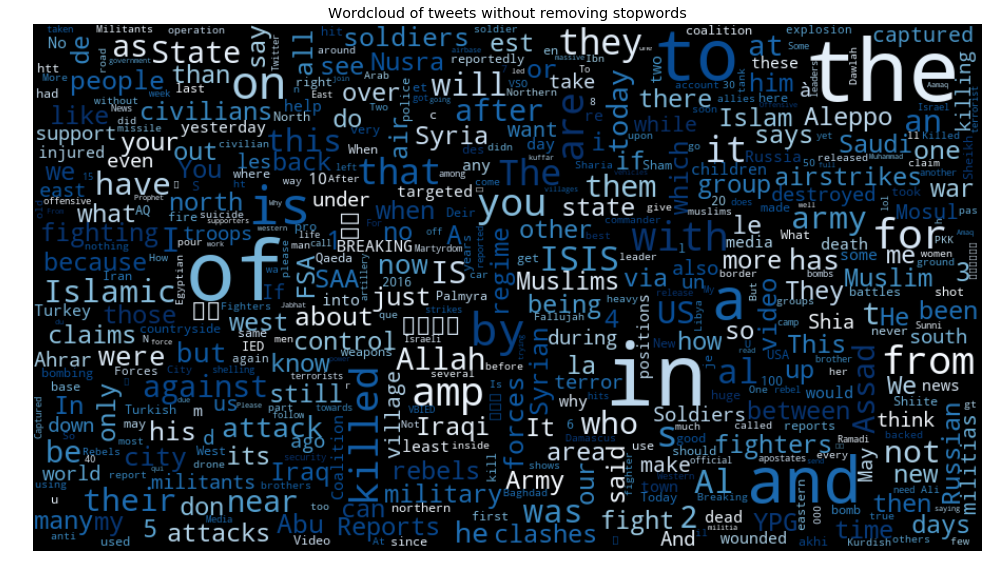

In [11]:
# CREATE WORDCLOUD
# split sentences to get individual words
all_words = []
for line in data['tweets_rec']: 
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of tweets without removing stopwords")
plt.show()

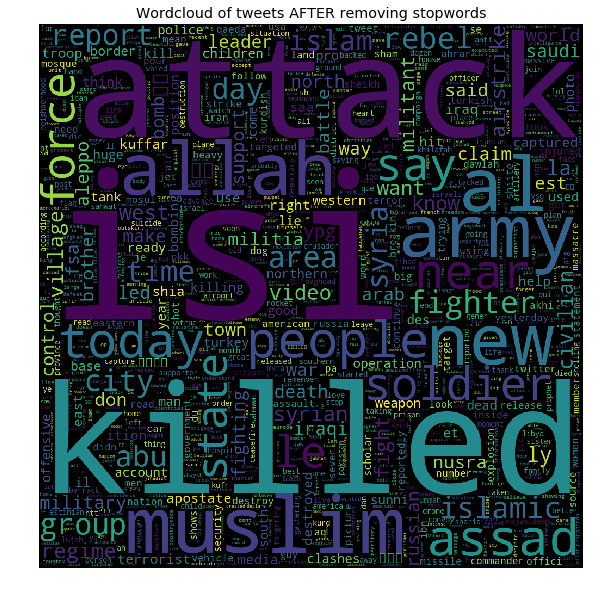

In [12]:
junk = re.compile("al|RT|\n|&.*?;|http[s](?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)*")
tweets = [junk.sub(" ", t) for t in data.tweets]

vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=.5)
tfv = vec.fit_transform(tweets)

terms = vec.get_feature_names()
wc = WordCloud(height=1000, width=1000, max_words=1000).generate(" ".join(terms))

plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis("off")
plt.title("Wordcloud of tweets AFTER removing stopwords")
plt.show()

In [41]:
# Break words into different rows, by username
rows = list()
for row in data[['username', 'tweets_rec']].iterrows():
    r = row[1]
    for word in r.tweets_rec:
        rows.append((r.username, word))

tweets_words = pd.DataFrame(rows, columns=['username', 'word'])
tweets_words.head()

,username,word
0,GunsandCoffee70,
1,GunsandCoffee70,A
2,GunsandCoffee70,MESSAGE
3,GunsandCoffee70,TO
4,GunsandCoffee70,THE
5,GunsandCoffee70,TRUTHFUL
6,GunsandCoffee70,IN
7,GunsandCoffee70,SYRIA
8,GunsandCoffee70,SHEIKH
9,GunsandCoffee70,ABU


In [42]:
# Removing empty cells
tweets_words = tweets_words[tweets_words.word.str.len() > 0]
tweets_words.head()

,username,word
1,GunsandCoffee70,A
2,GunsandCoffee70,MESSAGE
3,GunsandCoffee70,TO
4,GunsandCoffee70,THE
5,GunsandCoffee70,TRUTHFUL


In [43]:
# Convert to lower case words
tweets_words['word'] = tweets_words.word.str.lower()
tweets_words.head(100)

,username,word
1,GunsandCoffee70,a
2,GunsandCoffee70,message
3,GunsandCoffee70,to
4,GunsandCoffee70,the
5,GunsandCoffee70,truthful
6,GunsandCoffee70,in
7,GunsandCoffee70,syria
8,GunsandCoffee70,sheikh
9,GunsandCoffee70,abu
10,GunsandCoffee70,muhammed


**Wordcloud with Hashtags**

In [ ]:
# TBD

**Sentiment analysis**

In [ ]:
#TBD

**Emoji analysis**

In [1]:
#TBD
## clone the repository
! git clone https://github.com/huggingface/torchMoji.git

fatal: destination path 'torchMoji' already exists and is not an empty directory.


In [2]:
## download the pretrain# navigate to the torchmoji folder
! torchMoji/scripts/download_weights.py

'torchMoji' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# navigate to the torchmoji folder
import os
#os.chdir('torchMoji')
## install dependencies
! pip install -e .

Directory '.' is not installable. File 'setup.py' not found.


In [4]:
# add to sys.path
import sys
base_path = '' # change if you have downloaded folder elsewhere.
#base_path = '/mnt/b0c8e396-e5ba-4614-be6f-146c4c861ab3/torchMoji/' ## path to the torchmoji directory
#sys.path.insert(0, base_path)


In [ ]:
## Load model and tokenizer
from torchmoji.sentence_tokenizer import SentenceTokenizer
# load the deepmoji encoder that transforms text to emojies.
from torchmoji.model_def import torchmoji_emojis
from torchmoji.global_variables import PRETRAINED_PATH, VOCAB_PATH
import json,csv, numpy as np
import warnings; warnings.simplefilter('ignore')


## set the max context length
max_token = 30 ## This will not work for longer texts,
################# here you should consider splitting each text into smaller segments.

# Load vocab (i.e. the index of each word in the vector representation)
with open(VOCAB_PATH, 'r') as f:
    vocabulary = json.load(f)

# initialize tokenizer
sentence_tokenizer = SentenceTokenizer(vocabulary, max_token)
# load model
model = torchmoji_emojis(PRETRAINED_PATH)

In [ ]:
with open(base_path+'data/emoji_codes.json') as f:
    emoji_desc = json.load(f)
list(emoji_desc.items())[0:10]

In [ ]:
import emoji
def translate_emoji(emoji_descr):
    if emoji_descr in emoji.unicode_codes.EMOJI_ALIAS_UNICODE:
        return emoji.unicode_codes.EMOJI_ALIAS_UNICODE[emoji_descr]
    if emoji_descr in emoji.unicode_codes.EMOJI_UNICODE:
        return emoji.unicode_codes.EMOJI_UNICODE[emoji_descr]
    return emoji_descr
to_emoji = [translate_emoji(desc) for i,desc in sorted(emoji_desc.items(),key=lambda x: int(x[0]))]
to_emoji_desc = [desc for i,desc in sorted(emoji_desc.items(),key=lambda x: int(x[0]))]

## index 
to_emoji[0],to_emoji_desc[0]

**TF-IDF:** In the next part, I played around with the data following guidance from this blogpost online: https://sigdelta.com/blog/text-analysis-in-pandas/, which uses a TF-IDF method to analyze the frequency of words

Some notes/explanations on TF-IDF: https://medium.freecodecamp.org/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3

- Term Frequency — Inverse Data Frequency
- **Term Frequency (tf)**: gives us the frequency of the word in each document in the corpus. It is the ratio of number of times the word appears in a document compared to the total number of words in that document. It increases as the number of occurrences of that word within the document increases. Each document has its own tf.
- **Inverse Data Frequency (idf)**: used to calculate the weight of rare words across all documents in the corpus. The words that occur rarely in the corpus have a high IDF score. It is given by the equation below
- **TF-IDF**: Combining these two we come up with the TF-IDF score (w) for a word in a document in the corpus. It is the product of tf and idf:

In [44]:
counts = tweets_words.groupby('username')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts.head()

n_w
username  word     
04_8_1437 of     29
          in     19
          a      16
          the    15
          and    14

n_w
username     word           
04_8_1437    of           29
             in           19
             a            16
             the          15
             and          14
06230550_IS  the          53
             of           29
             a            16
             and          12
             to           12
1515Ummah    the          51
             in           45
             of           35
             al           20
             to           19
1Dawlah_III  of          110
             the          95
             in           73
             city         33
             a            27
432Mryam     you          20
             khair        14
             upp0rt       14
             jazakallah   13
             the          12
ALK___226    دعم          12
             of            6
             the           6
             الله          6
             in            5
...                      ...
war_analysis the          40
             in           38
             of           31
             to           28
             a            22
warreporter2 the         143
             of           88
             in           65
             to           60
             is           55
warrnews     in          653
             of          314
             the         298
             to          224
             and         215
wayf44rerr   of          140
             in          130
             and         102
             the          88
             by           87
wayff44rer   the          10
             of            9
             and           5
             al            4
             egyptian      4
wayyf44rer   in           30
             of           28
             al           24
             and          17
             by           17

[559 rows x 1 columns]

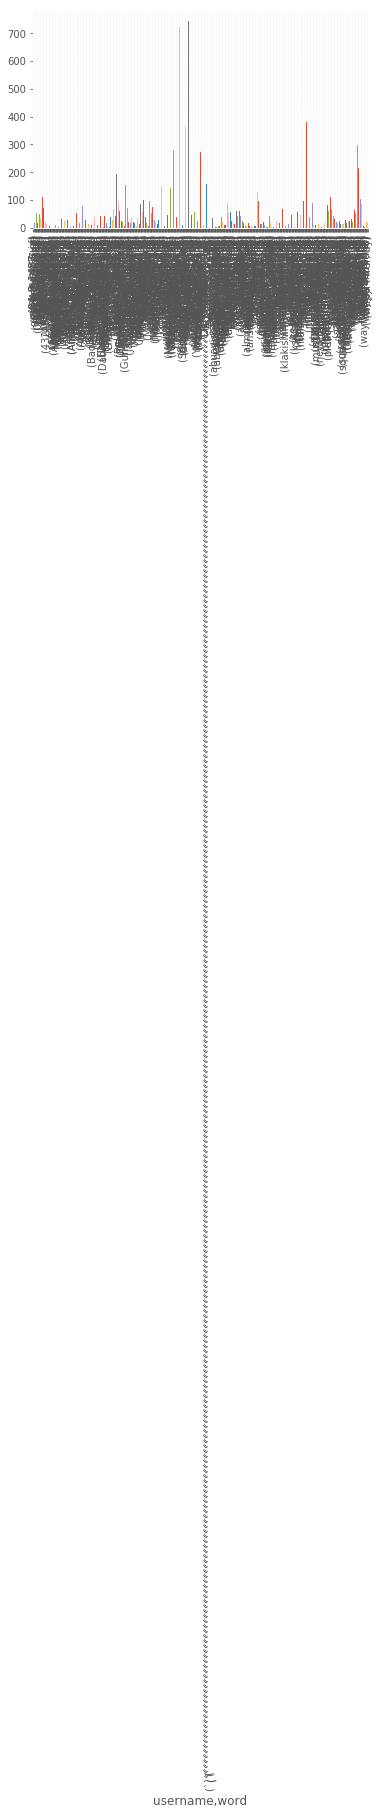

In [45]:
def pretty_plot_top_n(series, top_n=5, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar()
    return r.to_frame()

pretty_plot_top_n(counts['n_w'])

In [22]:
word_sum = counts.groupby(level=0)\
    .sum()\
    .rename(columns={'n_w': 'n_d'})
word_sum

,n_d
username,
04_8_1437,725
06230550_IS,976
1515Ummah,1482
1Dawlah_III,1056
432Mryam,442
ALK___226,331
Abdul__05,11
AbdusMujahid149,466
AbuLaythAlHindi,179


In [23]:
tf = counts.join(word_sum)

tf['tf'] = tf.n_w/tf.n_d

tf.head()

n_w  n_d        tf
username  word                          
04_8_1437 amaqagency   43  725  0.059310
          of           29  725  0.040000
          islamic      20  725  0.027586
          state        20  725  0.027586
          in           19  725  0.026207

tf
username     word                
04_8_1437    amaqagency  0.059310
             of          0.040000
             islamic     0.027586
             state       0.027586
             in          0.026207
06230550_IS  the         0.054303
             rt          0.046107
             of          0.029713
             a           0.016393
             is          0.014344
1515Ummah    rt          0.039136
             the         0.034413
             in          0.030364
             of          0.023617
             isis        0.022267
1Dawlah_III  of          0.104167
             the         0.089962
             in          0.069129
             city        0.031250
             a           0.025568
432Mryam     you         0.045249
             khair       0.031674
             upp0rt      0.031674
             jazakallah  0.029412
             rt          0.029412
ALK___226    دعم         0.036254
             أعماق       0.021148
             وكالة       0.021148
             amaqagency  0.018127
             of          0.018127
...                           ...
war_analysis rt          0.054720
             the         0.027360
             in          0.025992
             of          0.021204
             to          0.019152
warreporter2 the         0.048035
             rt          0.038629
             of          0.029560
             in          0.021834
             to          0.020155
warrnews     in          0.041285
             rt          0.029146
             of          0.019852
             the         0.018840
             to          0.014162
wayf44rerr   of          0.026173
             in          0.024304
             rt          0.023182
             and         0.019069
             the         0.016452
wayff44rer   the         0.050761
             of          0.045685
             and         0.025381
             al          0.020305
             egyptian    0.020305
wayyf44rer   in          0.032787
             of          0.030601
             al          0.026230
             and         0.018579
             by          0.018579

[560 rows x 1 columns]

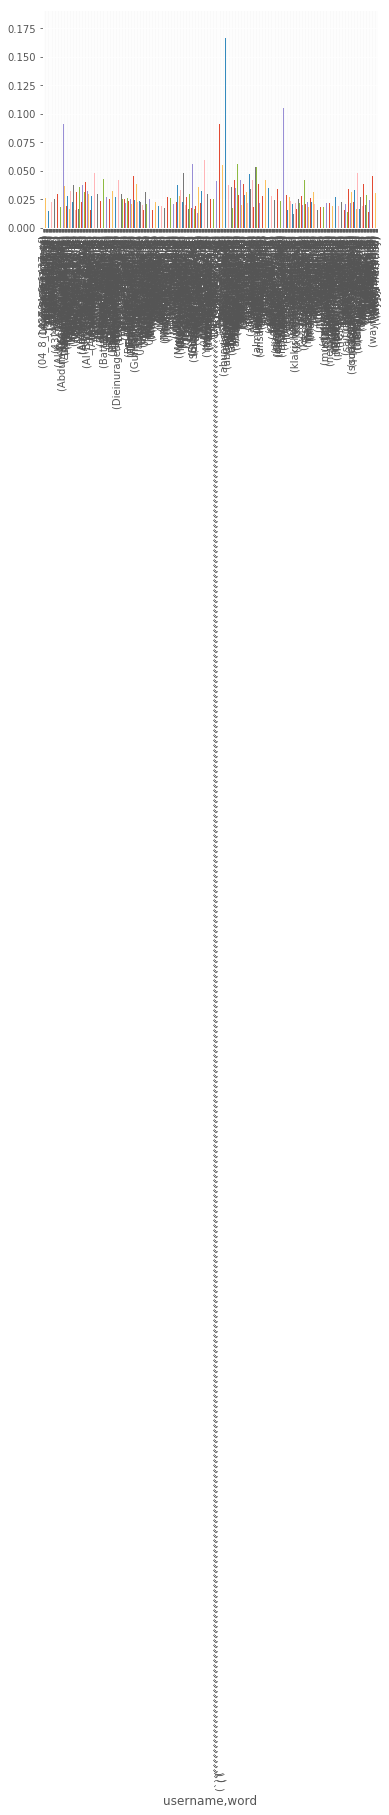

In [24]:
pretty_plot_top_n(tf['tf'])

In [25]:
c_d = tweets_words.username.nunique()
c_d

112

In [26]:
idf = tweets_words.groupby('word')\
    .username\
    .nunique()\
    .to_frame()\
    .rename(columns={'username':'i_d'})\
    .sort_values('i_d')
idf.head()

,i_d
word,
neutrality,1
salafiyah,1
salafists,1
salafiste,1
salafisme,1


In [27]:
idf['idf'] = np.log(c_d/idf.i_d.values)

idf.head()

,i_d,idf
word,,
neutrality,1,4.718499
salafiyah,1,4.718499
salafists,1,4.718499
salafiste,1,4.718499
salafisme,1,4.718499


In [28]:
tf_idf = tf.join(idf)

tf_idf.head()

n_w  n_d        tf  i_d       idf
username  word                                         
04_8_1437 amaqagency   43  725  0.059310   36  1.134980
          of           29  725  0.040000  108  0.036368
          islamic      20  725  0.027586   89  0.229863
          state        20  725  0.027586   87  0.252591
          in           19  725  0.026207  109  0.027151

In [29]:
tf_idf['tf_idf'] = tf_idf.tf * tf_idf.idf
tf_idf.head()

n_w  n_d        tf  i_d       idf    tf_idf
username  word                                                   
04_8_1437 amaqagency   43  725  0.059310   36  1.134980  0.067316
          of           29  725  0.040000  108  0.036368  0.001455
          islamic      20  725  0.027586   89  0.229863  0.006341
          state        20  725  0.027586   87  0.252591  0.006968
          in           19  725  0.026207  109  0.027151  0.000712

tf_idf
username     word                      
04_8_1437    amaqagency        0.067316
             khilafahnews      0.022946
             rigged            0.018385
             app               0.014560
             martyrdom         0.014089
06230550_IS  loool             0.010242
             5million          0.009669
             maslahat          0.009669
             preaches          0.009669
             bashed            0.008249
1515Ummah    ankara            0.009496
             barida            0.008148
             isis              0.008056
             aamaq             0.007483
             baqiyah           0.006805
1Dawlah_III  wilayataljazirah  0.020609
             wilayatninawa     0.019692
             qarytain          0.017873
             wilayatalbarakah  0.017140
             wilayatarraqqah   0.016713
432Mryam     upp0rt            0.127500
             jazakallah        0.057233
             ukhti             0.051338
             khair             0.048792
             upport            0.042701
ALK___226    دعم               0.131235
             أعماق             0.043976
             وكالة             0.043976
             اخي               0.037572
             خيرا              0.035368
...                                 ...
war_analysis vso               0.008249
             rt                0.006751
             bayaan            0.006455
             talhussein        0.006455
             ম                 0.006455
warreporter2 revelations       0.012169
             did               0.009969
             crusade           0.009399
             vs                0.007503
             episode           0.006761
warrnews     gaza              0.009860
             hamas             0.006920
             alqassam          0.006108
             isis              0.004803
             aleppo            0.004670
wayf44rerr   zuwaid            0.014951
             sinai             0.013218
             egyptian          0.009556
             zor               0.009396
             ez                0.008731
wayff44rer   rafahh            0.050744
             explosion         0.033045
             sukhna            0.031564
             egyptian          0.029653
             sinai             0.028148
wayyf44rer   gt                0.017301
             kyrgyzstan        0.015470
             uzbeki            0.015470
             zuwaid            0.014567
             qaryatayn         0.014421

[560 rows x 1 columns]

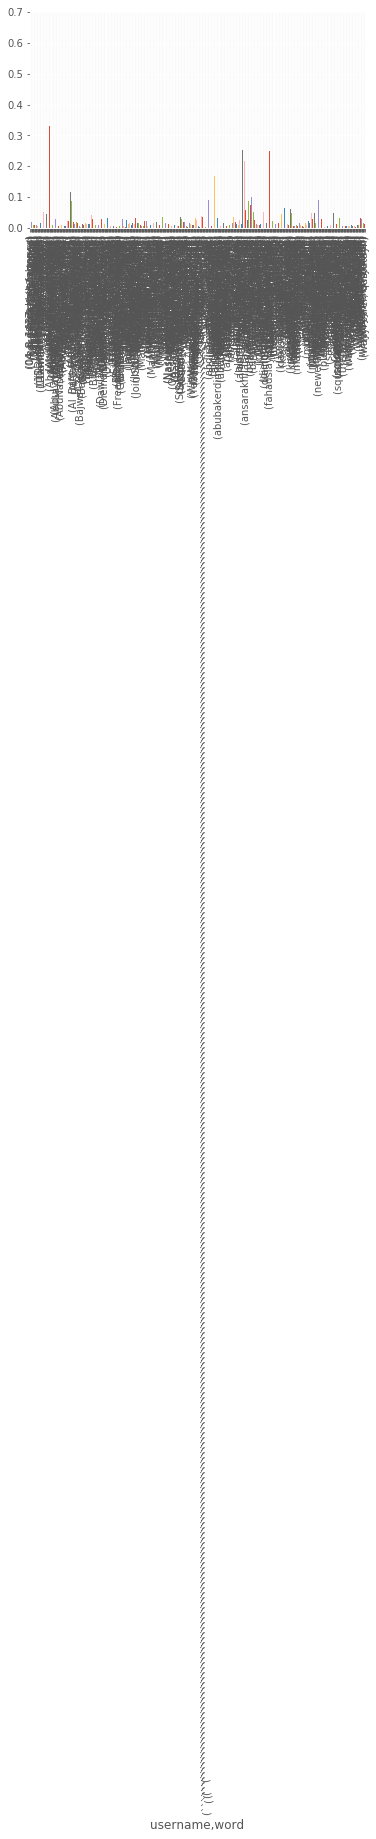

In [30]:
pretty_plot_top_n(tf_idf['tf_idf'])